In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# paths
ROOT = Path("..")
RAW = ROOT / "data" / "RAW"
PROC = ROOT / "data" / "PROCESSED"
FIGS = ROOT / "figures"

print("Using:", RAW, PROC, FIGS)

Using: ..\data\RAW ..\data\PROCESSED ..\figures


In [2]:
df = pd.read_csv(PROC / "listings_features.csv")
print(df.shape)
df.head(3)

(5000, 85)


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,price_clean,amenities_count,is_superhost,review_scores_avg,beds_per_guest,price_per_guest
0,1435793082787438351,https://www.airbnb.com/rooms/1435793082787438351,20250613040113,2025-06-13,city scrape,"SoCo Dream Stay | Rooftop, Pool, Gym, Central Loc",Stay in a stylish SoCo apartment just 10 min f...,"The apartment is in South Congress, one of the...",https://a0.muscache.com/pictures/hosting/Hosti...,423445570,...,8,0,0,2.0,130.0,81,1,5.0,0.5,21.666667
1,34792487,https://www.airbnb.com/rooms/34792487,20250613040113,2025-06-14,previous scrape,"Cental Austin - airport, bus and scooters nearby",Quite cozy room with private shower and sink. ...,"Radio Coffee and Beer is down the street, its ...",https://a0.muscache.com/pictures/147695fa-6003...,4710782,...,0,1,0,NaN,NaN,25,0,NaN,NaN,NaN
2,1116702837776875879,https://www.airbnb.com/rooms/1116702837776875879,20250613040113,2025-06-14,previous scrape,Wyndham Austin 2BR sleeps 6,This spacious two-bedroom resort suite measure...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,371942068,...,4,0,0,NaN,NaN,32,1,NaN,NaN,NaN


In [4]:
neigh = pd.read_json(RAW / "neighbourhoods.geojson")

In [5]:
neigh.head()

,type,features
0,FeatureCollection,"{'type': 'Feature', 'geometry': {'type': 'Mult..."
1,FeatureCollection,"{'type': 'Feature', 'geometry': {'type': 'Mult..."
2,FeatureCollection,"{'type': 'Feature', 'geometry': {'type': 'Mult..."
3,FeatureCollection,"{'type': 'Feature', 'geometry': {'type': 'Mult..."
4,FeatureCollection,"{'type': 'Feature', 'geometry': {'type': 'Mult..."


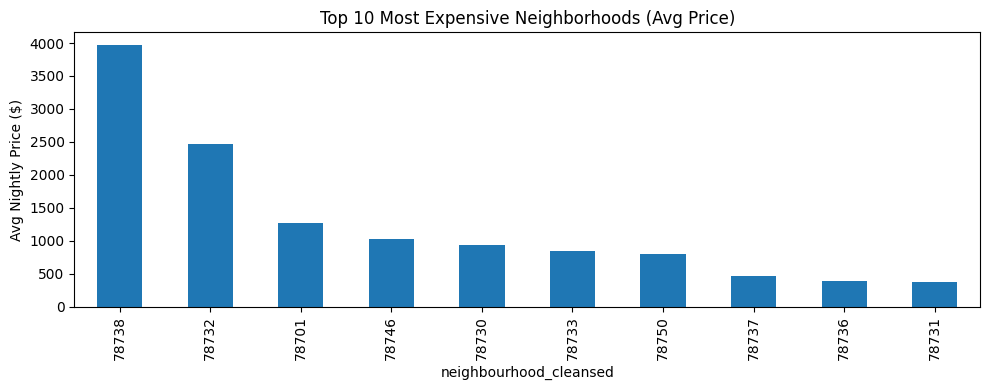

In [6]:
# Neighborhood average nightly price using the listings column only
import matplotlib.pyplot as plt

if "neighbourhood_cleansed" in df.columns:
    top10 = (
        df.groupby("neighbourhood_cleansed")["price_clean"]
          .mean()
          .sort_values(ascending=False)
          .head(10)
    )
    ax = top10.plot(kind="bar", figsize=(10,4), title="Top 10 Most Expensive Neighborhoods (Avg Price)")
    ax.set_ylabel("Avg Nightly Price ($)")
    plt.tight_layout()
    plt.savefig(FIGS / "neighborhood_avg_price.png")
    plt.show()
else:
    print("Column 'neighbourhood_cleansed' not found in df.")

In [7]:
 Calendar -> occupancy proxy (booked share)
cal = pd.read_csv(RAW / "calendar.csv.gz", nrows=500000)  # sample first ~500k rows
print(cal.head())

# 'available' is 't' (available) or 'f' (booked)
occ = cal.groupby("listing_id")["available"].apply(lambda x: (x == "f").mean()).reset_index(name="occupancy_rate")

# join back to listings
df = df.merge(occ, left_on="id", right_on="listing_id", how="left")

# quick plot
ax = df["occupancy_rate"].hist(bins=30, figsize=(8,4))
ax.set_title("Distribution of Occupancy Rates (sampled)")
ax.set_xlabel("Occupancy rate (0 = never booked, 1 = always booked)")
ax.set_ylabel("Count")
plt.tight_layout()
plt.savefig(FIGS / "occupancy_distribution.png")
plt.show()

# save the enriched file
PROC.mkdir(parents=True, exist_ok=True)
df.to_csv(PROC / "listings_with_occupancy.csv", index=False)
print("Saved to:", PROC / "listings_with_occupancy.csv")

IndentationError: unexpected indent (124760847.py, line 1)

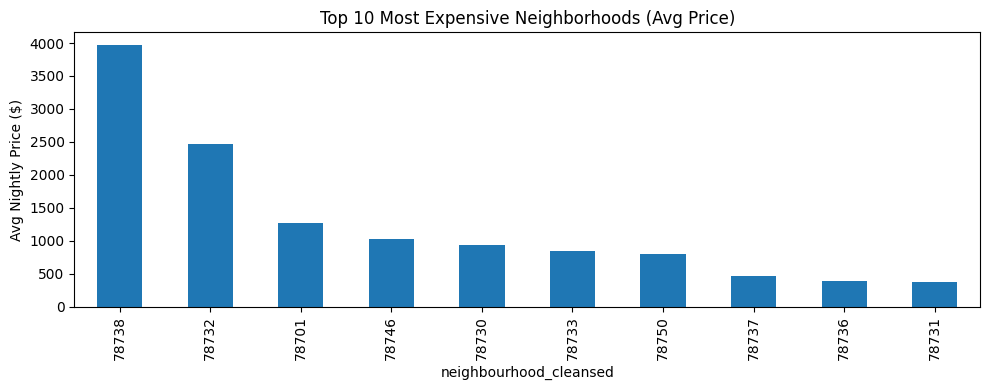

In [8]:
# Neighborhood average nightly price using the listings data only
import matplotlib.pyplot as plt

if "neighbourhood_cleansed" in df.columns:
    top10 = (
        df.groupby("neighbourhood_cleansed")["price_clean"]
          .mean()
          .sort_values(ascending=False)
          .head(10)
    )
    ax = top10.plot(kind="bar", figsize=(10,4),
                    title="Top 10 Most Expensive Neighborhoods (Avg Price)")
    ax.set_ylabel("Avg Nightly Price ($)")
    plt.tight_layout()
    plt.savefig(FIGS / "neighborhood_avg_price.png")
    plt.show()
else:
    print("Column 'neighbourhood_cleansed' not found in df.")